# - 군집을 위한 데이터 전처리
* 키오스크 데이터 군집화 및 지표 확인

## 0. 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [2]:
kio_data=pd.read_csv("data/final_data.csv")
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,3,0,3,0,0,0,0,05-20,15,목
397,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,3,0,3,0,0,0,0,05-20,15,목
398,2021-05-20 15:00:00,여자,청년,수도권,중립,한식,분식,일식,20.7,0.0,...,0,0,1,1,0,0,0,05-20,15,목
399,2021-05-22 09:00:00,남자,중장년,서울,우울,한식,일식,중식,17.5,0.0,...,2,0,2,0,1,1,0,05-22,9,토


## 2. 데이터 전처리

### 1) 휴일 컬럼 생성
* 평일 : 0 / 주말 : 1

* 설문 데이터셋의 경우 기간이 짧아 모든 요일을 반영하기 어렵다고 판단

In [3]:
# 각 요일별 value counts

kio_data["요일"].value_counts()

화    148
일    147
월     47
수     43
목     14
토      2
Name: 요일, dtype: int64

In [4]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"요일"]=="일":
        kio_data.loc[i,"휴일"]= 1
    else:
        kio_data.loc[i,"휴일"]= 0
        
        
kio_data['휴일'] = kio_data['휴일'].astype('int')

In [5]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,2,0,0,1,05-16,14,일,1
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,1,0,2,0,0,05-16,15,일,1
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,3,3,0,0,0,05-16,15,일,1
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,0,0,05-16,15,일,1
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,2,0,0,0,05-16,16,일,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,0,3,0,0,0,0,05-20,15,목,0
397,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,0,3,0,0,0,0,05-20,15,목,0
398,2021-05-20 15:00:00,여자,청년,수도권,중립,한식,분식,일식,20.7,0.0,...,0,1,1,0,0,0,05-20,15,목,0
399,2021-05-22 09:00:00,남자,중장년,서울,우울,한식,일식,중식,17.5,0.0,...,0,2,0,1,1,0,05-22,9,토,0


### 2) 요일

In [6]:
weekday = {'월': 0, '화': 1, '수': 2, '목':3, '금':4, '토':5, '일':6}

kio_data.replace({'요일':weekday}, inplace=True)
kio_data['요일'].unique()

array([6, 0, 1, 2, 3, 5], dtype=int64)

### 3) 성별
* 남자 : 0 , 여자 : 1인 범주형 변수로 변경

In [7]:
sex = {"남자": 0,"여자": 1}

kio_data.replace({'성별':sex}, inplace=True)

kio_data['성별'].unique()

array([0, 1], dtype=int64)

### 4) 나이

In [8]:
age = {"청소년": 0,"청년": 1,"중장년": 2,"노년":3}

kio_data.replace({'연령대': age}, inplace=True)
kio_data['연령대'].unique()

array([1, 2, 0, 3], dtype=int64)

### 5) 감정

In [9]:
feel = {"행복": 0,"중립": 1,"분노": 2,"우울":3}

kio_data.replace({'기분': feel}, inplace=True)

kio_data['기분'].unique()

array([0, 2, 1, 3], dtype=int64)

### 6) 강수량

* 강수 유무로 변경
* 비 X : 0 , 비 O : 1

In [10]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"강수량"] == 0:
        kio_data.loc[i,"비"] = 0
    else:
        kio_data.loc[i,"비"]=1
        
        
kio_data['비'] = kio_data['비'].astype('int')

In [11]:
## 온도 변경 
# kio_data["구간온도"]=pd.qcut(kio_data["기온"],4,labels=[0,1,2,3])

### 7) 전운량 
* [기상청 전운량](https://www.weather.go.kr/weather/climate/past_cal.jsp)을 기준으로 하여 
* 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경


In [12]:
kio_data.loc[(kio_data['전운량']>=0) & (kio_data['전운량']<=5), '전운량']=0 

kio_data.loc[(kio_data['전운량']>=6) & (kio_data['전운량']<=8), '전운량']=1

kio_data.loc[(kio_data['전운량']>=9) & (kio_data['전운량']<=10), '전운량']=2

kio_data['전운량'].unique()

array([2, 1, 0], dtype=int64)

### 8) 시간대
* 아침(나머지) : 0 , 점심(11\~16) : 1, 저녁(16\~23) : 2으로 변경

In [13]:
kio_data["시간"].value_counts()

17    73
16    51
12    43
14    35
18    27
13    25
20    25
9     24
10    24
15    20
21    15
22    10
19     7
11     7
23     6
7      3
0      3
6      1
5      1
2      1
Name: 시간, dtype: int64

In [14]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"시간"]>=16 and kio_data.loc[i,"시간"]<=23:
        kio_data.loc[i,"식사시간"]=2
    elif kio_data.loc[i,"시간"]>=11 and kio_data.loc[i,"시간"]<16:
        kio_data.loc[i,"식사시간"]=1
    else:
        kio_data.loc[i,"식사시간"]=0
kio_data["식사시간"]=kio_data["식사시간"].astype("int")

In [15]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,식사시간
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,2,0,0,1,05-16,14,6,1,1,1
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,0,2,0,0,05-16,15,6,1,1,1
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,3,0,0,0,05-16,15,6,1,1,1
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,0,05-16,15,6,1,1,1
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,2,0,0,0,05-16,16,6,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,0,05-20,15,3,0,1,1
397,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,0,05-20,15,3,0,1,1
398,2021-05-20 15:00:00,1,1,수도권,1,한식,분식,일식,20.7,0.0,...,1,0,0,0,05-20,15,3,0,0,1
399,2021-05-22 09:00:00,0,2,서울,3,한식,일식,중식,17.5,0.0,...,0,1,1,0,05-22,9,5,0,0,0


## 3. 최종 데이터셋

In [16]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,식사시간
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,2,0,0,1,05-16,14,6,1,1,1
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,0,2,0,0,05-16,15,6,1,1,1
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,3,0,0,0,05-16,15,6,1,1,1
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,0,05-16,15,6,1,1,1
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,2,0,0,0,05-16,16,6,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,0,05-20,15,3,0,1,1
397,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,0,05-20,15,3,0,1,1
398,2021-05-20 15:00:00,1,1,수도권,1,한식,분식,일식,20.7,0.0,...,1,0,0,0,05-20,15,3,0,0,1
399,2021-05-22 09:00:00,0,2,서울,3,한식,일식,중식,17.5,0.0,...,0,1,1,0,05-22,9,5,0,0,0


# - 군집

## 0. 군집을 위한 데이터 추출

In [17]:
cluster_data = kio_data.copy()[['성별', '연령대', '기분', '강수량', '전운량', '비', '휴일', '기압', '기온',"식사시간"]]
cluster_data

,성별,연령대,기분,강수량,전운량,비,휴일,기압,기온,식사시간
0,0,1,0,1.6,2,1,1,993.6,17.5,1
1,1,2,2,1.4,2,1,1,989.6,18.5,1
2,0,1,1,1.4,2,1,1,989.6,18.5,1
3,1,1,0,1.4,2,1,1,989.6,18.5,1
4,0,1,0,2.6,2,1,1,990.5,20.6,2
...,...,...,...,...,...,...,...,...,...,...
396,0,0,0,0.7,2,1,0,993.1,16.3,1
397,0,0,0,0.7,2,1,0,993.1,16.3,1
398,1,1,1,0.0,2,0,0,997.0,20.7,1
399,0,2,3,0.0,1,0,0,1001.8,17.5,0


### 1. 상관 관계

In [18]:
cluster_data.corr()

,성별,연령대,기분,강수량,전운량,비,휴일,기압,기온,식사시간
성별,1.000000,0.117399,0.024251,-0.209508,-0.285569,-0.285092,-0.281878,0.285653,0.129027,-0.047887
연령대,0.117399,1.000000,-0.047501,-0.240225,-0.220283,-0.305692,-0.374156,0.293154,0.022010,-0.287884
기분,0.024251,-0.047501,1.000000,0.060049,0.060756,0.016674,0.009997,-0.030893,-0.009239,-0.001972
강수량,-0.209508,-0.240225,0.060049,1.000000,0.648260,0.764109,0.861432,-0.836141,-0.207613,0.538501
전운량,-0.285569,-0.220283,0.060756,0.648260,1.000000,0.802055,0.682934,-0.770886,-0.541669,0.190743
비,-0.285092,-0.305692,0.016674,0.764109,0.802055,1.000000,0.803445,-0.835328,-0.407273,0.454936
휴일,-0.281878,-0.374156,0.009997,0.861432,0.682934,0.803445,1.000000,-0.915284,-0.155935,0.611739
기압,0.285653,0.293154,-0.030893,-0.836141,-0.770886,-0.835328,-0.915284,1.000000,0.190552,-0.511510
기온,0.129027,0.022010,-0.009239,-0.207613,-0.541669,-0.407273,-0.155935,0.190552,1.000000,0.176124
식사시간,-0.047887,-0.287884,-0.001972,0.538501,0.190743,0.454936,0.611739,-0.511510,0.176124,1.000000


In [19]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
    
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    

<AxesSubplot:>

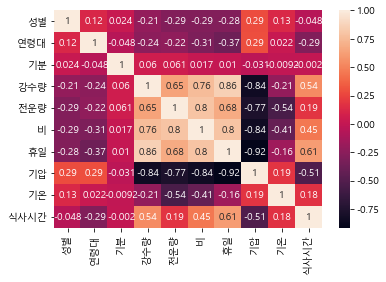

In [20]:
sns.heatmap(cluster_data.corr(), annot=True)

* 강수량, 전운량, 비 column과 휴일 간의 상관관계가 매우 높게 나옴
    * 이는 설문 조사 기간(2021-05-15 ~ 2021-05-22)의 주말에 계속 비가 왔기때문으로 보임
    * **휴일 컬럼을 사용하지 않는 것이 좋을 것으로 판단**"

In [21]:
## 휴일 컬럼 삭제
cluster_data.drop(['휴일','기압', '기온','강수량'] , axis=1, inplace=True)
cluster_data

,성별,연령대,기분,전운량,비,식사시간
0,0,1,0,2,1,1
1,1,2,2,2,1,1
2,0,1,1,2,1,1
3,1,1,0,2,1,1
4,0,1,0,2,1,2
...,...,...,...,...,...,...
396,0,0,0,2,1,1
397,0,0,0,2,1,1
398,1,1,1,2,0,1
399,0,2,3,1,0,0


<AxesSubplot:>

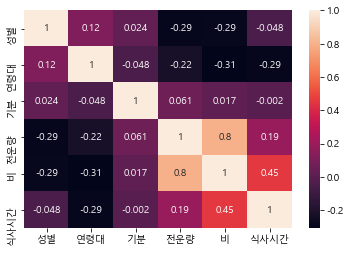

In [22]:
sns.heatmap(cluster_data.corr(), annot=True)

### 선택된 피쳐 더미화

In [23]:
data = pd.get_dummies(cluster_data.astype('str'))
data

,성별_0,성별_1,연령대_0,연령대_1,연령대_2,연령대_3,기분_0,기분_1,기분_2,기분_3,전운량_0,전운량_1,전운량_2,비_0,비_1,식사시간_0,식사시간_1,식사시간_2
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


### 더미화 데이터 columns 이름 변경

In [24]:
data.columns =['남자',"여자","청소년","청년","중장년","노년","행복","중립","우울","분노","맑음","구름조금","흐림","비안옴","비옴","아침","점심","저녁"]

In [25]:
data

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


# 인류통계학 더미 데이터 저장

In [26]:
data.to_csv("data/people_data.csv",index=False)
pd.read_csv("data/people_data.csv")

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


### 2. kmeans. inertia


In [27]:
from sklearn.cluster import KMeans

In [28]:
inertia_arr = []
k_range = range (2,51)

for k in k_range :
    
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(data)
    inertia = Kmeans.inertia_
    
    print(f'k : {k} \t inertia : {inertia:.2f}')
    
    inertia_arr.append(inertia)

inertia_arr = np.array(inertia_arr)

k : 2 	 inertia : 1007.24
k : 3 	 inertia : 891.43
k : 4 	 inertia : 795.10
k : 5 	 inertia : 731.92
k : 6 	 inertia : 693.03
k : 7 	 inertia : 637.25
k : 8 	 inertia : 593.05
k : 9 	 inertia : 573.32
k : 10 	 inertia : 543.38
k : 11 	 inertia : 516.03
k : 12 	 inertia : 494.40
k : 13 	 inertia : 469.41
k : 14 	 inertia : 471.65
k : 15 	 inertia : 445.81
k : 16 	 inertia : 427.21
k : 17 	 inertia : 412.26
k : 18 	 inertia : 403.26
k : 19 	 inertia : 393.27
k : 20 	 inertia : 379.14
k : 21 	 inertia : 361.61
k : 22 	 inertia : 350.02
k : 23 	 inertia : 341.94
k : 24 	 inertia : 328.85
k : 25 	 inertia : 322.58
k : 26 	 inertia : 319.18
k : 27 	 inertia : 303.82
k : 28 	 inertia : 292.81
k : 29 	 inertia : 281.42
k : 30 	 inertia : 272.92
k : 31 	 inertia : 262.74
k : 32 	 inertia : 255.46
k : 33 	 inertia : 248.66
k : 34 	 inertia : 241.20
k : 35 	 inertia : 234.63
k : 36 	 inertia : 230.73
k : 37 	 inertia : 223.95
k : 38 	 inertia : 221.14
k : 39 	 inertia : 207.94
k : 40 	 inertia : 

## Elbow Method

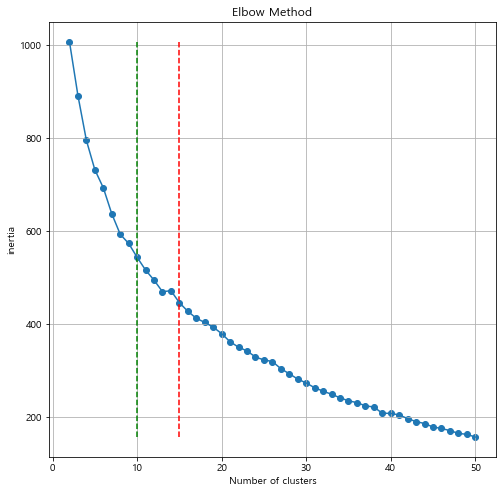

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(k_range, inertia_arr)
plt.scatter(k_range, inertia_arr)
plt.vlines(10, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors="g")
plt.vlines(15, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors="r")

plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

## 군집 실루엣

In [30]:
from sklearn.metrics import silhouette_score,silhouette_samples

k_range = range(2,20)

best_n = -1
best_silhouette_score = -1

for k in k_range :
    
    kmeans = KMeans(n_clusters=k, random_state=200, init='k-means++', max_iter=300)
    kmeans.fit(data)
    clusters = kmeans.predict(data)

    
    #모든 데이터의 평균 실루엣 계수값을 구함
    score = silhouette_score(data, clusters)
    print("k :",k, "score :", score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n :',best_n,'best score :', best_silhouette_score)

k : 2 score : 0.2700980907101336
k : 3 score : 0.2434374791696134
k : 4 score : 0.24495082114559483
k : 5 score : 0.23798992443470707
k : 6 score : 0.23429801420944077
k : 7 score : 0.2473047314699707
k : 8 score : 0.2790862759687151
k : 9 score : 0.26230220581621455
k : 10 score : 0.28099969928161206
k : 11 score : 0.2903408600287097
k : 12 score : 0.29914378019487775
k : 13 score : 0.3221946810216801
k : 14 score : 0.3022959551492347
k : 15 score : 0.32946790887016764
k : 16 score : 0.35312956697518144
k : 17 score : 0.35070135684545073
k : 18 score : 0.3515171025683761
k : 19 score : 0.3732127611389432
best n : 19 best score : 0.3732127611389432


In [31]:
data

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


### 최고 군집인 13으로 군집
1. 전체 실루엣 계수의 평균값, 즉 사이킷런읜 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울 수록 좋다.
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 작아야한다.
   즉 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않    는 것이 중요하다.
   만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히      높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화가 아니다.

In [32]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
kmeans = KMeans(n_clusters=13, init='k-means++', max_iter=300,random_state=200).fit(data)

#추가 라벨이 붙지않는 오리지널 데이터(data는 cluster나 silhouette_coeff같은 새 컬럼이 추가 될 예정)
origin_data=data.copy()

data['cluster'] = kmeans.labels_

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(origin_data, data['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# data 실루엣 계수 컬럼 추가
data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(origin_data, data['cluster'])
print('데이터셋 Silhouette Analysis Score:'.format(average_score))
print(average_score)
data.head(3)

silhouette_samples( ) return 값의 shape (401,)
데이터셋 Silhouette Analysis Score:
0.3221946810216801


,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁,cluster,silhouette_coeff
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.352650
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,-0.008944
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,12,0.418715


In [33]:
origin_data

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


### 각 군집별 실루엣값 평균

In [34]:
data.groupby('cluster')['silhouette_coeff'].mean()

cluster
0     0.204464
1     0.246942
2     0.230887
3     0.190035
4     0.599149
5     0.261815
6     0.533903
7     0.234811
8     0.419146
9     0.164773
10    0.265360
11    0.142659
12    0.437201
Name: silhouette_coeff, dtype: float64

### 군집 실루엣 시각화를 통한 최적화

In [35]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=300, random_state=200)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [36]:
origin_data

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


### K-budrbsdmfh 군집화 및 실루엣시각화

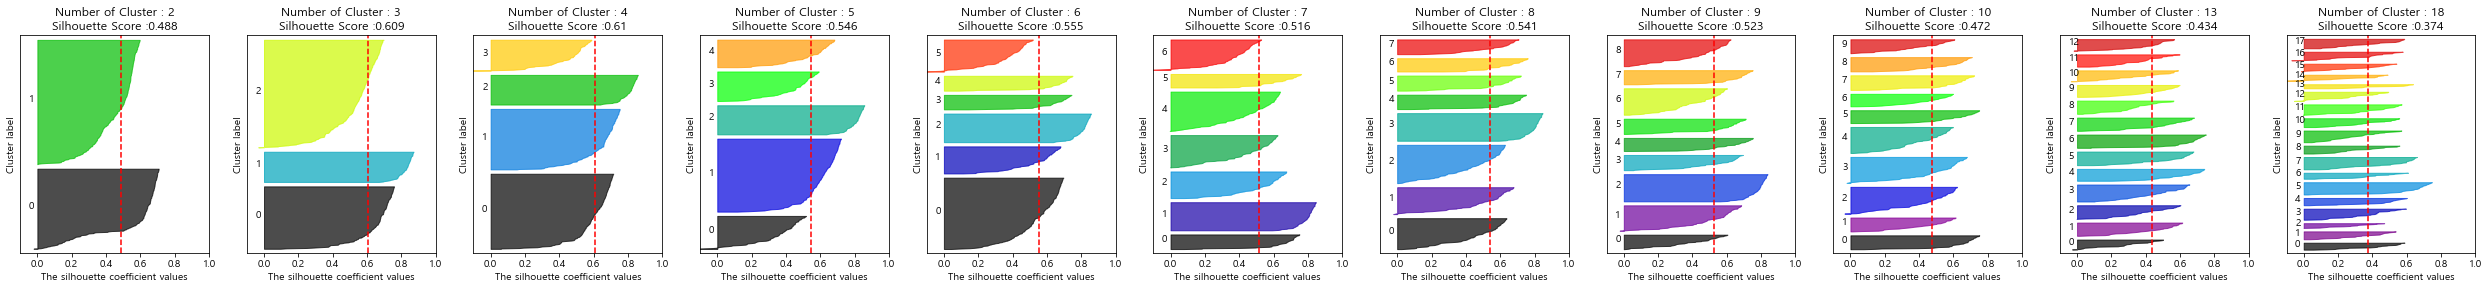

In [37]:
import numpy as np
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=13, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5,6,7,8,9,10,13,18], X)

In [38]:
origin_data

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


### k-means 군집 실루엣 시각화

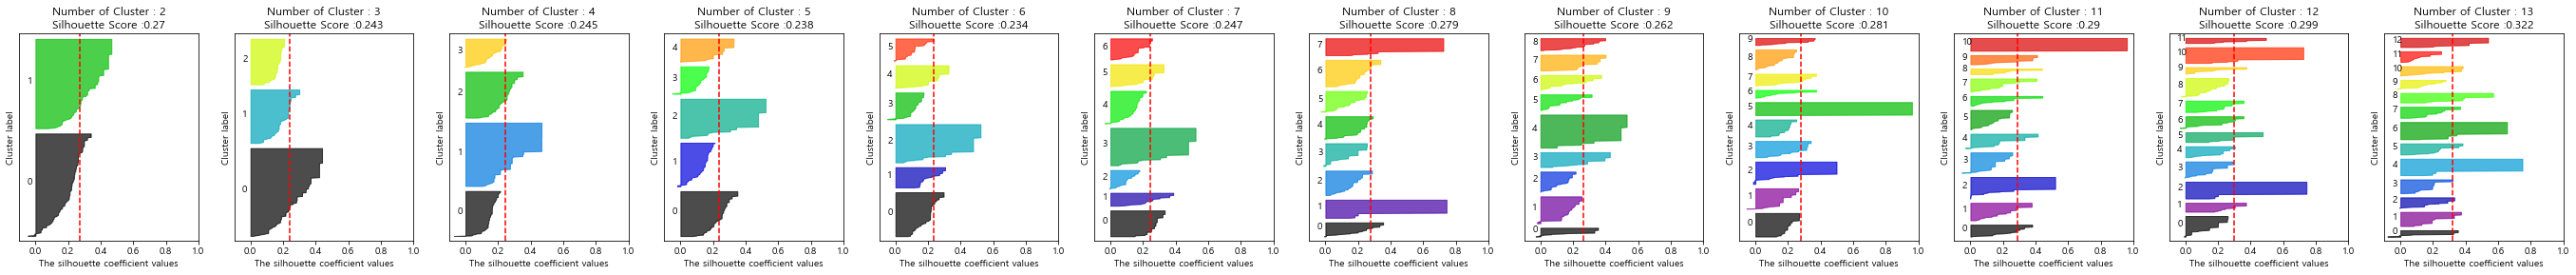

In [39]:
from sklearn.datasets import load_iris

visualize_silhouette([ 2, 3, 4,5 ,6,7,8,9,10,11,12,13], origin_data)

In [40]:
data

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁,cluster,silhouette_coeff
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.352650
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,-0.008944
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,12,0.418715
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.323360
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,6,0.289569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,-0.079732
397,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,-0.079732
398,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,7,0.094788
399,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,10,0.039445


In [41]:
data.groupby(["cluster"]).sum()

,남자,여자,청소년,청년,중장년,노년,행복,중립,우울,분노,맑음,구름조금,흐림,비안옴,비옴,아침,점심,저녁,silhouette_coeff
cluster,,,,,,,,,,,,,,,,,,,
0,10,8,2,12,1,3,17,0,1,0,0,0,18,0,18,4,14,0,3.680351
1,0,38,12,15,11,0,24,5,1,8,36,2,0,38,0,0,0,38,9.383811
2,0,28,0,20,7,1,10,16,2,0,0,3,25,1,27,1,1,26,6.464834
3,22,15,0,0,36,1,22,8,1,6,37,0,0,37,0,9,28,0,7.031311
4,44,0,44,0,0,0,0,33,6,5,0,1,43,0,44,1,0,43,26.362560
5,21,9,0,28,2,0,10,9,1,10,1,5,24,30,0,30,0,0,7.854457
6,46,0,32,9,5,0,46,0,0,0,0,2,44,0,46,1,0,45,24.559535
7,17,13,0,30,0,0,10,12,2,6,27,1,2,30,0,0,30,0,7.044345
8,2,24,26,0,0,0,15,5,1,5,26,0,0,26,0,3,23,0,10.897803


## 13개로 군집한 라벨값과 ineritia

In [42]:
print(f'13 Cluster ineritia : {kmeans.inertia_:.2f}')

print(f"Cluster memberships:\n{kmeans.labels_}")

13 Cluster ineritia : 469.41
Cluster memberships:
[ 0  0 12  0  6  2 11  2 11  2  2 11  4  6 11 12 11 11 11 11  2  6  2  6
  6  2 11  2 12  6  4  6 12  4  6  6  4  6  4  6  4  2  4 12  6  2 11  6
  4  6  4  4  4  6  4  4  6  2  4  6  4  6  4  4  4  6  6  4  4 11  4  6
  6  4  4  2  6  4 12 11 12  2  2 12 12 11 12  2 11  6 11  2 12 11 12 12
  6  4  4  4  4  4  2  2  2 11  6  6 11  2  6  6  6  6  4  4  6  4  6  6
  4  4  6  6  6  6  6  4  6  4  4  4  4  4  2 12 11  6  4  2  6  2  4  6
  4 12  6  2  6  4 11  5  5  5  5  5  5  5  5  0 11  5  5  5 11  0  0  7
  2  0 12  0 11 12 12  0 11  0  0 12 12  0  0 12 12 11 12  2  6 11  2 11
  1 12  5  5  5  5  5  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10  7 10 10 10 10 10  3  3  3  3  3  3  7  3  3  3
  3  7  3  3  3  3  7  3  3  3  7  7  7  3  3  3  3  7  3  7  3  7  7  3
  8  8  8  3  8  8  8  7  8  8  8  8  8  3  8  8  8  7  7  8  8  7  7  8
  7  8  8  7  7  7  8  3  9  1  9  9  1  9  1  9  1  1  1  1  1  1  1  9
 

## 13개 군집시 군집 간 거리

In [43]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(kmeans.cluster_centers_, metric='euclidean')), columns=set(kmeans.labels_))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,2.555502,1.682783,2.349070,2.176062,2.001728,1.612850,2.123473,2.440444,2.475653,2.261899,1.753676,1.755477
1,2.555502,0.000000,2.021095,1.754647,2.713869,2.245075,2.495625,1.833544,1.590014,1.458800,2.104841,2.320353,2.725109
2,1.682783,2.021095,0.000000,2.654141,1.941949,2.217207,1.879801,2.451267,2.659607,2.392916,2.550250,1.424712,1.610301
3,2.349070,1.754647,2.654141,0.000000,2.908752,2.137207,2.707825,1.479153,1.586819,1.625931,1.463016,2.643108,2.714927
4,2.176062,2.713869,1.941949,2.908752,0.000000,2.528127,1.318178,2.866422,2.839991,2.328618,2.972494,1.825760,1.497344
5,2.001728,2.245075,2.217207,2.137207,2.528127,0.000000,2.410666,1.838478,2.431083,1.876832,2.135893,2.025845,2.049889
6,1.612850,2.495625,1.879801,2.707825,1.318178,2.410666,0.000000,2.779672,2.786832,2.157964,2.693198,1.791374,1.815538
7,2.123473,1.833544,2.451267,1.479153,2.866422,1.838478,2.779672,0.000000,1.620249,1.601995,1.877711,2.419854,2.253649
8,2.440444,1.590014,2.659607,1.586819,2.839991,2.431083,2.786832,1.620249,0.000000,2.119218,2.014004,2.786354,2.999647
9,2.475653,1.458800,2.392916,1.625931,2.328618,1.876832,2.157964,1.601995,2.119218,0.000000,2.111175,2.209856,2.172400


## 각 군집 중심점 값

In [44]:
kmeans.cluster_centers_

array([[ 5.55555556e-01,  4.44444444e-01,  1.11111111e-01,
         6.66666667e-01,  5.55555556e-02,  1.66666667e-01,
         9.44444444e-01,  0.00000000e+00,  5.55555556e-02,
         0.00000000e+00, -5.55111512e-17,  2.77555756e-17,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.22222222e-01,  7.77777778e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  3.15789474e-01,
         3.94736842e-01,  2.89473684e-01,  1.38777878e-17,
         6.31578947e-01,  1.31578947e-01,  2.63157895e-02,
         2.10526316e-01,  9.47368421e-01,  5.26315789e-02,
        -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,
        -5.55111512e-17,  3.33066907e-16,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         7.14285714e-01,  2.50000000e-01,  3.57142857e-02,
         3.57142857e-01,  5.71428571e-01,  7.14285714e-02,
         0.00000000e+00, -2.22044605e-16,  1.07142857e-01,
         8.92857143e-01,  3.57142857e-02,  9.64285714e

## 전체 데이터에서 메뉴컬럼만 추출

In [45]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

## 추출한 컬럼과 군집 및 라벨링이 된 자료 합치기

In [46]:
final_data = kio_data.copy()

final_data['label'] = kmeans.labels_

final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,식사시간,label
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,6,1,1,1,0
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,6,1,1,1,0
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,6,1,1,1,12
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,6,1,1,1,0
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,6,1,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,05-20,15,3,0,1,1,0
397,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,05-20,15,3,0,1,1,0
398,2021-05-20 15:00:00,1,1,수도권,1,한식,분식,일식,20.7,0.0,...,0,0,0,05-20,15,3,0,0,1,7
399,2021-05-22 09:00:00,0,2,서울,3,한식,일식,중식,17.5,0.0,...,1,1,0,05-22,9,5,0,0,0,10


In [47]:
kio_data.columns

Index(['시간대', '성별', '연령대', '지역', '기분', '1순위', '2순위', '3순위', '기온', '강수량', '습도',
       '기압', '전운량', '불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
       '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕',
       '날짜', '시간', '요일', '휴일', '비', '식사시간'],
      dtype='object')

# 군집 더미화 및 음식데이터랑 합치기

In [48]:
cluster_label_dumy=pd.get_dummies(kmeans.labels_.astype('str'))
cluster_label_dumy

,0,1,10,11,12,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,0,0,0,0,0,0,0,0,0,0,0
397,1,0,0,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,1,0,0
399,0,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
kio_menu=kio_data[['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
       '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕',]]
kio_menu

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2,2,0,0,0,2,0,0,1,1,1,3,0,3,0,0,0,0
397,2,2,0,0,0,2,0,0,1,1,1,3,0,3,0,0,0,0
398,0,0,0,3,3,0,2,2,0,0,0,0,0,1,1,0,0,0
399,3,3,0,0,0,0,0,0,0,0,0,2,0,2,0,1,1,0


In [50]:
pd.concat([cluster_label_dumy,kio_menu],axis=1).to_csv("data/people_cluster_menu.csv",index=False)

In [51]:
pd.read_csv("data/people_cluster_menu.csv")

,0,1,10,11,12,2,3,4,5,6,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,2,0,0,0,3,3,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0,0,0,0,0,0,0,0,0,...,1,1,1,3,0,3,0,0,0,0
397,1,0,0,0,0,0,0,0,0,0,...,1,1,1,3,0,3,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
399,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,2,0,1,1,0


In [52]:

# 각 군집 별 원하는 데이터를 plotting하는 함수

def label_plotting(data=None, label=0):
    '''
    params : 
        1) data : 넣고 싶은 label이 있는 데이터
        2) label : 보고 싶은 label(군집)
        
    return :
        각 군집 별 열(['성별' , '연령대', '기분', '전운량', '비'])의 value_counts bar 그래프
    
    '''
    
    ## 기초 subplot 생성
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))


    # 보고 싶은 열
    ax_list = ['성별' , '연령대', '기분', '전운량', '비',"식사시간"]

    # x label을 위한 딕셔너리 정의
    ax_dic = {'성별' : ['남', '여'] , '연령대': ['청소년', '청년', '중장년', '노년'] ,
             '기분': ['행복', '중립', '분노', '우울'], '전운량' : ['맑음', '구름조금', '흐림'],
             '비': ['비안옴', '비옴'],
             "식사시간" : ["아침","점심","저녁"]}


    # 그리기 위한 ravel()
    axis = axes.ravel()
    plt.suptitle('군집 ' +str(label) +'에 해당하는 데이터의 value_counts',fontsize=20)
    
    # 그래프 그리는 코드
    for i, ax in enumerate(ax_dic.keys()):
        
        
        # label에 해당하는 데이터 슬라이싱
        tmp_df = data.loc[data['label'] == label]

        # 열에 따른 value_counts()
        tmp = tmp_df[ax].value_counts()

        # 그래프 생성
        tmp.plot(kind='bar', ax=axis[i])

        # xlabel을 위한 feature_name
        feature_name = [ax_dic[ax][n] for n in tmp.index]

        # label 생성
        axis[i].set_xticklabels(feature_name, rotation=45)
        axis[i].grid() # 격자
        axis[i].set_title(str(ax))
        plt.tight_layout() 

    plt.show()

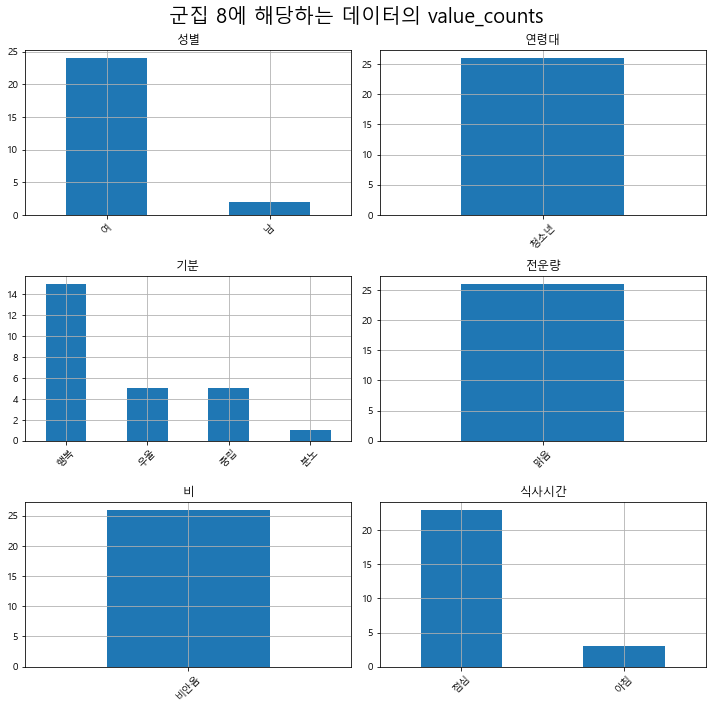

In [53]:
label_plotting(data=final_data, label=8)

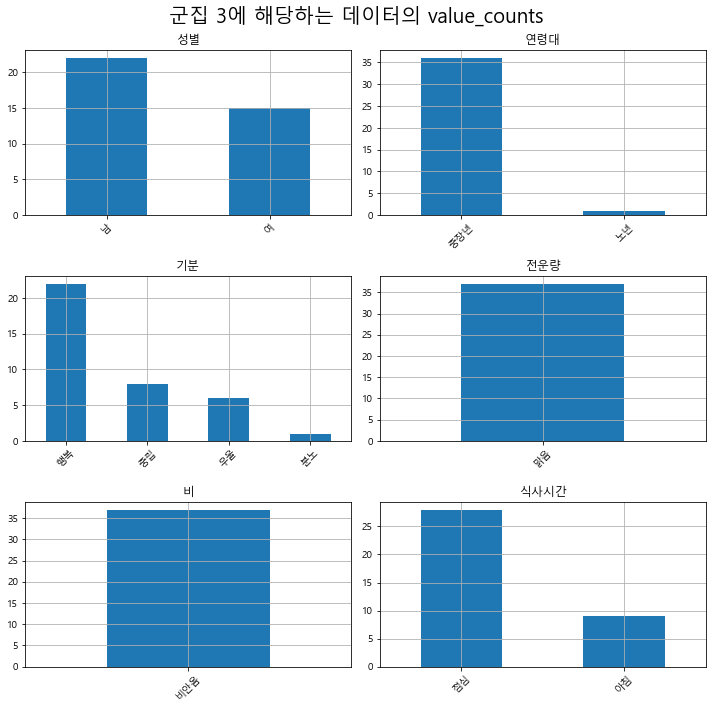

In [54]:
label_plotting(data=final_data, label=3)

## AgglomerativeClustering(계층적 클러스터링)

## 알맞는 linkages  설정,군집갯수 구하기

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

linkages = ["single", "average","complete"]
k_range = range(2,11)
k_silhouette_df = pd.DataFrame(k_range, columns=["k"])

for connect in linkages :
    
    k_silhouette = []
    print(connect)
    
    for k in k_range :
        
        clustering = AgglomerativeClustering(n_clusters=k, linkage=connect)
        clusters = clustering.fit_predict(data)
        score = silhouette_score(data,clusters)
        
        print(f'k : {k} \t score : {score:.3f}')
        
        result = [score]
        k_silhouette.append(result)
        
    score_df = pd.DataFrame(k_silhouette, columns = [connect + '_score'])
    k_silhouette_df = pd.concat([k_silhouette_df, score_df],axis=1)

single
k : 2 	 score : 0.334
k : 3 	 score : 0.374
k : 4 	 score : 0.361
k : 5 	 score : 0.373
k : 6 	 score : 0.361
k : 7 	 score : 0.391
k : 8 	 score : 0.441
k : 9 	 score : 0.434
k : 10 	 score : 0.426
average
k : 2 	 score : 0.469
k : 3 	 score : 0.388
k : 4 	 score : 0.393
k : 5 	 score : 0.369
k : 6 	 score : 0.366
k : 7 	 score : 0.378
k : 8 	 score : 0.400
k : 9 	 score : 0.408
k : 10 	 score : 0.432
complete
k : 2 	 score : 0.469
k : 3 	 score : 0.388
k : 4 	 score : 0.393
k : 5 	 score : 0.363
k : 6 	 score : 0.354
k : 7 	 score : 0.378
k : 8 	 score : 0.401
k : 9 	 score : 0.457
k : 10 	 score : 0.482


## 실루엣 결과 (값이 높을수록 좋음)

In [56]:
k_silhouette_df

,k,single_score,average_score,complete_score
0,2,0.333993,0.468774,0.468774
1,3,0.374346,0.387949,0.387949
2,4,0.360570,0.392519,0.392519
3,5,0.372705,0.369132,0.363473
4,6,0.361028,0.366328,0.354170
5,7,0.391167,0.378464,0.378464
6,8,0.440774,0.399827,0.401296
7,9,0.433595,0.408409,0.457445
8,10,0.425677,0.431749,0.481782


 전체적으로 average_score가 잘나왔고 
 k 값은 10이 가장 적당해보임

## 10으로로 군집

In [57]:
from sklearn.cluster import AgglomerativeClustering

clustering=AgglomerativeClustering(n_clusters = 10, linkage="complete").fit(data)

In [58]:
clustering

AgglomerativeClustering(linkage='complete', n_clusters=10)

In [59]:
clustering.labels_

array([4, 4, 1, 4, 7, 3, 1, 3, 1, 3, 3, 1, 8, 7, 1, 1, 1, 1, 1, 1, 3, 7,
       3, 7, 7, 3, 1, 3, 1, 7, 8, 7, 1, 8, 7, 7, 8, 7, 8, 7, 8, 3, 8, 1,
       7, 3, 1, 7, 8, 7, 8, 8, 8, 7, 8, 8, 7, 3, 8, 7, 8, 7, 8, 8, 8, 7,
       7, 8, 8, 1, 8, 7, 7, 8, 8, 3, 7, 8, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       1, 7, 1, 3, 1, 1, 1, 1, 7, 8, 8, 8, 8, 8, 3, 3, 3, 1, 7, 7, 1, 3,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 8, 8, 8,
       8, 8, 3, 1, 1, 7, 8, 3, 7, 3, 8, 7, 8, 1, 7, 3, 7, 8, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 1, 5, 5, 5, 1, 4, 4, 2, 3, 4, 1, 4, 1, 1, 1, 4,
       1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 3, 7, 1, 3, 1, 9, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 2,
       6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 6, 6, 6, 6, 2, 6, 2, 6, 2, 2, 6,
       2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 0, 9, 0, 0, 9,

## 군집된 라벨 달아주기

In [60]:
compete_data = kio_data.copy()

compete_data['label'] = kmeans.labels_

compete_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,식사시간,label
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,6,1,1,1,0
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,6,1,1,1,0
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,6,1,1,1,12
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,6,1,1,1,0
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,6,1,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,05-20,15,3,0,1,1,0
397,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,05-20,15,3,0,1,1,0
398,2021-05-20 15:00:00,1,1,수도권,1,한식,분식,일식,20.7,0.0,...,0,0,0,05-20,15,3,0,0,1,7
399,2021-05-22 09:00:00,0,2,서울,3,한식,일식,중식,17.5,0.0,...,1,1,0,05-22,9,5,0,0,0,10


###  군집으로 메뉴 추천 결과

In [61]:
tt = compete_data.loc[compete_data['label'] == 0 ]

feel = {"행복": 0,"중립": 1,"분노": 2,"우울":3}
age = {"청소년": 0,"청년": 1,"중장년": 2,"노년":3}

# ['성별', '연령대', '기분', '전운량', '비']
# 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경

tt['기분'].value_counts()

    
    

0    17
2     1
Name: 기분, dtype: int64

In [62]:
compete_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,식사시간,label
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,6,1,1,1,0
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,6,1,1,1,0
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,6,1,1,1,12
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,6,1,1,1,0
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,6,1,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,05-20,15,3,0,1,1,0
397,2021-05-20 15:00:00,0,0,경상도,0,일식,한식,양식,16.3,0.7,...,0,0,0,05-20,15,3,0,1,1,0
398,2021-05-20 15:00:00,1,1,수도권,1,한식,분식,일식,20.7,0.0,...,0,0,0,05-20,15,3,0,0,1,7
399,2021-05-22 09:00:00,0,2,서울,3,한식,일식,중식,17.5,0.0,...,1,1,0,05-22,9,5,0,0,0,10


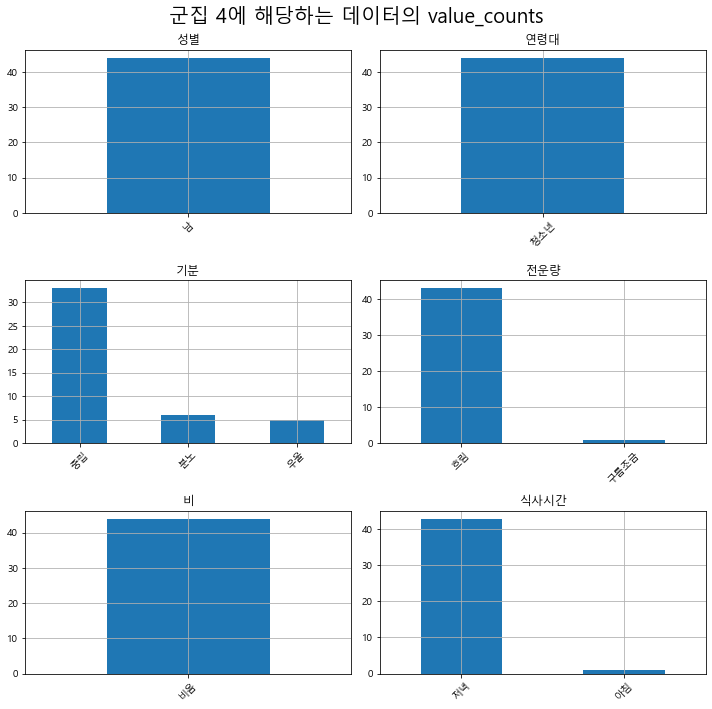

In [63]:
label_plotting(data=final_data, label=4)